In [1]:
%matplotlib inline
%precision 3

u'%.3f'

In [1]:
import thinkstats2
import thinkplot
import ReadCsvs as rc
import JointAngFuncs as jaf
import KneeAngleHypTest as kneehyp
import math
import numpy as np
import matplotlib.pyplot as plt

/Users/jpoh/anaconda/lib/python2.7/site-packages/pytz/__init__.py:29: UserWarning: Module argparse was already imported from /Users/jpoh/anaconda/lib/python2.7/argparse.pyc, but /Users/jpoh/anaconda/lib/python2.7/site-packages is being added to sys.path
  from pkg_resources import resource_stream


In [2]:
AFO, PPAFO, Shoes=rc.ReadGaitData()

IOError: [Errno 2] No such file or directory: 'Csvs/fname.csv'

####Computes the joint angles and plots them

In [4]:
# def JointAngles(AFO, PPAFO, Shoes, fw, pnum, trial, mark1, mark2, mark3):
#     """
#     This function computes the joint angles for a given participant, trial and set of markers
    
#     fw: a string that defines the footwear being studied; Should be either 'AFO', 'PPAFO' or 'Shoes'
#     pnum: integer value for the participant number; Should be a number between 1 and 16
#     trial: integer value for the trial number being studied; Should be a number between 1 and 10
#     mark1: a string that defines the marker label for the marker above the joint being studied
#     mark2: a string that defines the marker label for the marker at the joint being studied
#     mark3: a string that defines the marker label for the marker below the joint being studied
    
#     returns indices (a list of frame numbers), theta_t (a list of joint angles in radians)
#     """
    
#     theta_t=[]
    
#     if fw=='AFO':
#         dset=AFO
        
#     if fw=='PPAFO':
#         dset=PPAFO
        
#     if fw=='Shoes':
#         dset=Shoes
        
        
#     MT_Obj=dset[pnum].GetTrial(trial) #AFO trial 4 for participant 1

#     mark1_x = MT_Obj.x[mark1]
#     mark2_x = MT_Obj.x[mark2]
#     mark3_x = MT_Obj.x[mark3]

#     #mark1_y = MT_Obj.y[mark1]
#     #mark2_y = MT_Obj.y[mark2]
#     #mark3_y = MT_Obj.y[mark3]

#     mark1_z = MT_Obj.z[mark1]
#     mark2_z = MT_Obj.z[mark2]
#     mark3_z = MT_Obj.z[mark3]

# #    x_dir_vec=[1,0,0]
# #    y_dir_vec=[0,1,0]
# #    z_dir_vec=[0,0,1]

#     for i in range(len(mark1_x)):
    
#         vec21_x=mark1_x[i]-mark2_x[i]
#         #vec21_y=mark1_y[i]-mark2_y[i]
#         vec21_z=mark1_z[i]-mark2_z[i]
        
#         vec23_x=mark3_x[i]-mark2_x[i]
#         #vec23_y=mark3_y[i]-mark2_y[i]
#         vec23_z=mark3_z[i]-mark2_z[i]
    
#         #vec12=[vec21_x, vec21_y, vec21_z]
#         vec12=[vec21_x, vec21_z]
#         #vec23=[vec23_x, vec23_y, vec23_z]
#         vec23=[vec23_x, vec23_z]
    
#         #Apply cos (theta) = (A dot B)/(modA modB)
#         theta=math.acos((np.dot(vec12, vec23))/((np.linalg.norm(vec12))*(np.linalg.norm(vec23))))
    
#         theta_t.append(theta/math.pi*180)
    
#     indices=MT_Obj.x.index.get_values()
    
#     return indices, theta_t


# def AngleDiff(AFO, PPAFO, Shoes, fw, participant, baselineTrial, WalkTrial, mark1, mark2, mark3, plot=False, reverse=False):
#     """
#     This function computes the difference between each angle in the walking trial and the median of the baseline trial to
#     obtain the change in angle from baseline while the participant is walking.
    
#     fw: a string that defines the footwear being studied; Should be either 'AFO', 'PPAFO' or 'Shoes'
#     participant: integer value for the participant number; Should be a number between 1 and 16
#     WalkTrial: integer value for the trial number of the walking trial being studied; Should be a number between 4 and 10
#     mark1: a string that defines the marker label for the marker above the joint being studied
#     mark2: a string that defines the marker label for the marker at the joint being studied
#     mark3: a string that defines the marker label for the marker below the joint being studied
    
#     returns R_angle_changes (list of change in joint angle from baseline in degrees)
#     """

#     #trial=3

#     R_ind_base, R_theta_base=JointAngles(AFO, PPAFO, Shoes, fw, participant, baselineTrial, mark1, mark2, mark3)
    
#     cdf1=thinkstats2.Cdf(R_theta_base)
#     median_R=cdf1.Percentile(50)
#     #print "Baseline Median =", median_R
    
#     #trial=WalkTrial
#     R_ind, R_theta=JointAngles(AFO, PPAFO, Shoes, fw, participant, WalkTrial, mark1, mark2, mark3)
    
#     if plot==True:
        
#         thinkplot.Cdf(cdf1)
#         thinkplot.Show(legend=False, title='Angle Baseline', xlabel='Angle in degrees', ylabel='CDF')
#         thinkplot.Plot(R_ind_base, R_theta_base)
#         #thinkplot.Config(ylim=[135,145])
#         thinkplot.Show(legend=False, title='Angle Baseline Time Series', xlabel='Time in frames', ylabel='Angle in degrees')

    
#         cdf3=thinkstats2.Cdf(R_theta)
#         thinkplot.Cdf(cdf3)
#         thinkplot.Show(legend=False, title='Walking', xlabel='Angle in degrees', ylabel='CDF')
#         thinkplot.Plot(R_ind, R_theta)
#         #thinkplot.Config(ylim=[135,145])
#         thinkplot.Show(legend=False, title='Walking Time Series', xlabel='Time in frames', ylabel='Angle in degrees')

#     R_angle_changes=[]

#     if reverse==True:
#         for eachang in R_theta:
#             R_angle_changes.append(-(eachang-median_R))
#     elif reverse==False:
#         for eachang in R_theta:
#             R_angle_changes.append((eachang-median_R))
        
        
#     return R_angle_changes

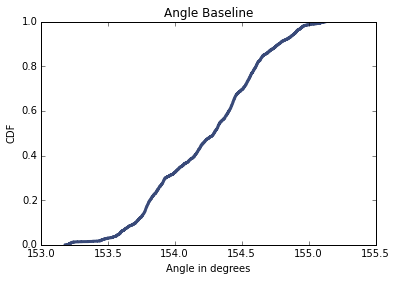

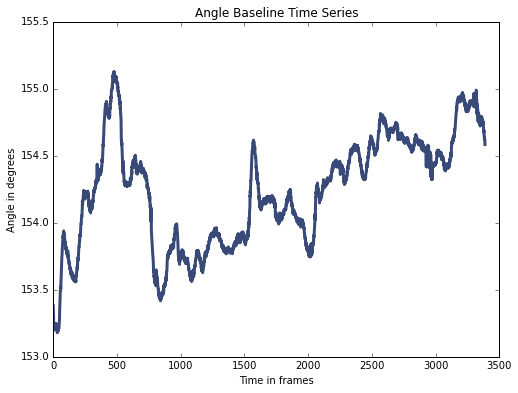

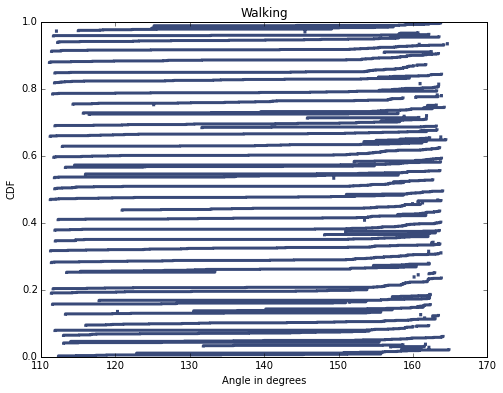

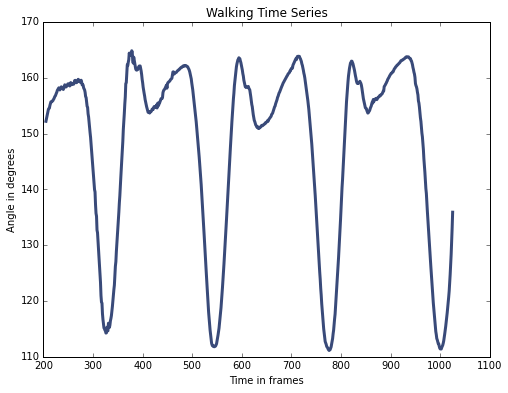

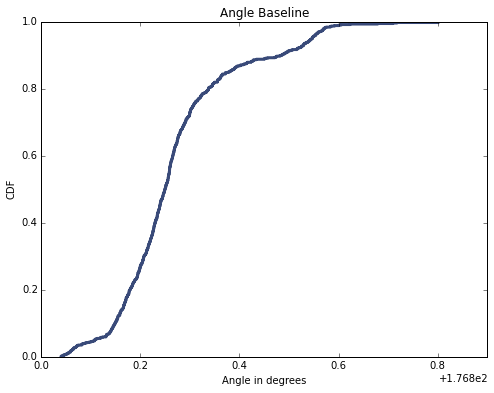

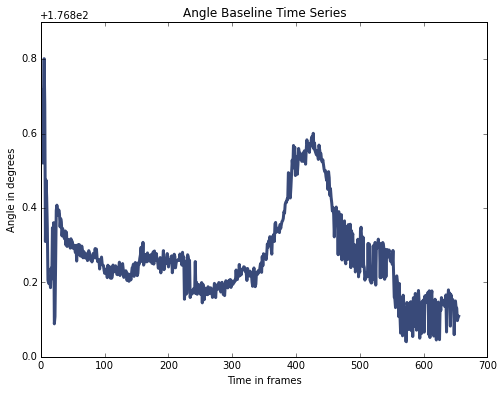

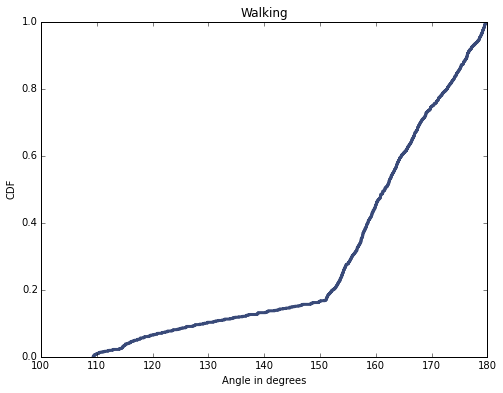

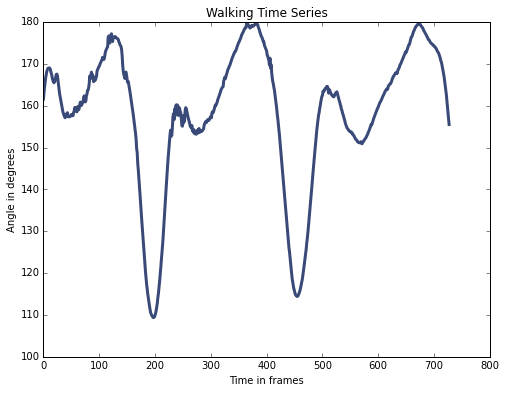

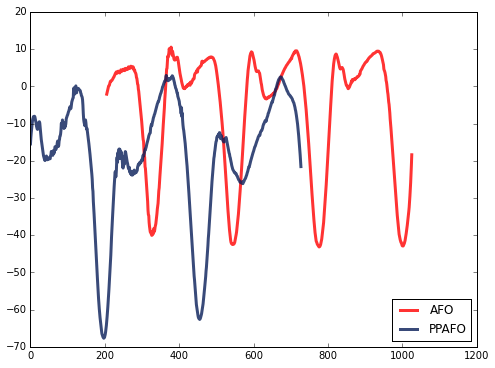

In [5]:
Raw_AFO_R_angle=jaf.AngleDiff(AFO, PPAFO, Shoes,'AFO', 11, 1,4, 'R_TROCH', 'R_LAT_KNEE', 'R_LAT_MAL', True, False)
Raw_PPAFO_R_angle=jaf.AngleDiff(AFO, PPAFO, Shoes,'PPAFO', 1, 1, 4, 'R_TROCH', 'R_LAT_KNEE', 'R_LAT_MAL', True, False)
Raw_Shoes_R_angle=jaf.AngleDiff(AFO, PPAFO, Shoes,'Shoes', 1, 1, 4, 'R_TROCH', 'R_LAT_KNEE', 'R_LAT_MAL', False, False)

thinkplot.Plot(Raw_AFO_R_angle, label='AFO', color='red')
thinkplot.Plot(Raw_PPAFO_R_angle, label='PPAFO')
thinkplot.Show(legend=True, loc='lower right')

Note on reading the angles: Swinging your leg out increases the knee angle, bending your knees decreases your knee angle

#### This was the original hypothesis test that relied on the anglediff computation above

In [6]:
print kneehyp.KneeAngleHypTest(Raw_PPAFO_R_angle, Raw_AFO_R_angle)

Actual Observed Effect Size= -12.0728702909
1.0


In [7]:
# def KneeAngleHypTest_General(AFO, PPAFO, Shoes, fw1, fw2, pnum, baselinetrial, trialnum):
#     """
#     This function is the generalized version of the KneeAngleHypTest that carries out the knee angle hypothesis test and returns the pvalue
    
#     AFO: Data Dictionary for the AFO condition
#     PPAFO: Data Dictionary for the PPAFO condition
#     Shoes: Data Dictionary for the Shoes condition
#     fw1: string specifying footwear condition 1
#     fw2: string specifying footwear condition 2
#     pnum: integer for participant number
#     baselinetrial: integer specifying the trial number for the baseline
#     trialnum: integer specifying the trial number for the walking trial
    
#     returns: pvalue of the hypothesis test
#     """
    
    
#     Raw_data1=jaf.AngleDiff(AFO, PPAFO, Shoes, fw1, pnum, baselinetrial, trialnum, 'R_TROCH', 'R_LAT_KNEE', 'R_LAT_MAL', False, False)
#     Raw_data2=jaf.AngleDiff(AFO, PPAFO, Shoes, fw2, pnum, baselinetrial, trialnum, 'R_TROCH', 'R_LAT_KNEE', 'R_LAT_MAL', False, False)
    
#     data1, data2=jaf.RemoveNans(Raw_data1, Raw_data2)
    
#     testmean_1=np.asarray(data1).mean()
#     testmean_2=np.asarray(data2).mean()
    
#     print testmean_1
#     print testmean_2
    
#     if np.isnan(testmean_1)!=True and np.isnan(testmean_2)!=True:
#         #print AFO_angle
#         data=(data1, data2)
#         ht=kneehyp.KneeAngleHT(data)
#         print "Actual Observed Effect Size=", ht.actual

#         pvalue=ht.PValue()
#         return pvalue
#     else:
#         print "Participant ", pnum, "Trial ", trialnum, "has returned nan so it will be skipped!"

####This is a generalized version of the knee angle hypothesis test that computes its own anglediff data internally

In [8]:
print kneehyp.KneeAngleHypTest_General(AFO, PPAFO, Shoes, 'PPAFO', 'AFO', 2, 1, 7, 'R')

nan
-9.14339361597
Participant  2 Trial  7 has returned nan so it will be skipped!
None


/Users/jpoh/anaconda/lib/python2.7/site-packages/numpy/core/_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)


####This portion conducts the knee angle hypothesis on all paticipants

In [9]:
#Builds a reference table of which side has the orthotic

leg_lookup={1:'L', 2:'R', 3:'R', 4:'R', 5:'R', 6:'L', 7:'R', 9:'L', 10:'R', 11:'L', 12:'L', 13:'L', 15:'L', 16:'R', 18:'L', 19:'R'}

In [10]:
t=dict()
sides =['R', 'L']
for participant in AFO.keys():
    afo_keys=AFO[participant].trials.keys()
    ppafo_keys=PPAFO[participant].trials.keys()
    overlap=set(afo_keys) & set(ppafo_keys)
    print 'ppafo=', ppafo_keys
    
    if overlap:
    
        baselinetrial=min(overlap)
    
        for eachtrial in overlap:
            if eachtrial>3:
                side=leg_lookup[participant]
                print "Participant=", participant
                print 'eachtrial=', eachtrial
                print side
                result=kneehyp.KneeAngleHypTest_General(AFO, PPAFO, Shoes,'PPAFO', 'AFO', participant, baselinetrial, eachtrial, side)
                if result !=None:
                    print "pvalue =", result[0]
                    t[(participant, eachtrial, side)]=result
        

ppafo= [1, 2, 3, 4, 5, 6, 7, 8, 9]
Participant= 1
eachtrial= 4
L
-9.6061811139
-26.139908157
Actual Observed Effect Size= 16.5337270431
pvalue = 0.0
Participant= 1
eachtrial= 5
L
-13.0376668024
-13.1677047864
Actual Observed Effect Size= 0.130037984072
pvalue = 0.447
Participant= 1
eachtrial= 6
L
-8.30674340425
-19.9786211211
Actual Observed Effect Size= 11.6718777168
pvalue = 0.0
Participant= 1
eachtrial= 7
L
-10.481579787
-15.8725192494
Actual Observed Effect Size= 5.39093946238
pvalue = 0.0
Participant= 1
eachtrial= 8
L
-8.96650214687
-21.2443460901
Actual Observed Effect Size= 12.2778439432
pvalue = 0.0
Participant= 1
eachtrial= 9
L
-6.1724963343
-13.6279715141
Actual Observed Effect Size= 7.45547517976
pvalue = 0.0
ppafo= [1, 2, 3, 4, 5, 6, 7, 8]
Participant= 2
eachtrial= 4
R
-7.36950063705
-2.46296208359
Actual Observed Effect Size= -4.90653855346
pvalue = 1.0
Participant= 2
eachtrial= 5
R
-2.99173855851
-8.17086124692
Actual Observed Effect Size= 5.17912268841
pvalue = 0.0
Parti

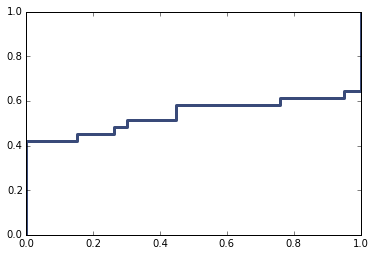

cleant= 31


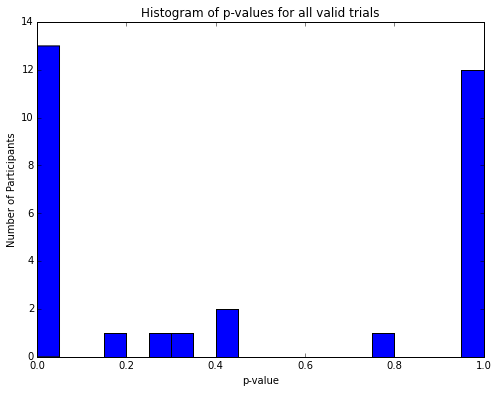

[0.0, 0.001]
Total number of participants with valid tests:  31
Number of people with pval=0: 12
Number of poeple with statistically significant pvalue: 13
41.9 % of participants ( 13 ) have a statistically significant pvalue which suggests their knee is hyperextending


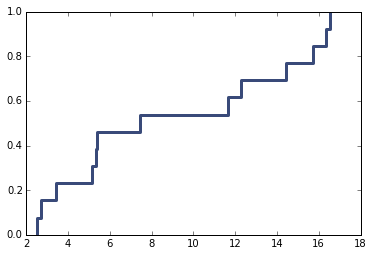

In [12]:
clean_t=[]
clean_eff=[]

#print len(t.values())

for item in t.values():
    if item[0] !=None and item[1]!=None:
        clean_t.append(item[0])
        if item[0]<=0.05:
            clean_eff.append(item[1])

cdf=thinkstats2.Cdf(clean_t)
thinkplot.Cdf(cdf)
thinkplot.Show(legend=False)

hist=thinkstats2.Hist(clean_t)
# thinkplot.Hist(hist)
# thinkplot.Show(legend=False, xlabel='p-values', ylabel='# of trials', title='Histogram of number of trials with each p-value')
print 'cleant=',len(clean_t)
plt.hist(clean_t, 1/0.05)
plt.xlabel('p-value')
plt.ylabel('Number of Participants')
plt.title('Histogram of p-values for all valid trials')
plt.show()

values=hist.Values()
#print values

sig_val=[]
[sig_val.append(value) for value in values if value<=0.05]

print sig_val

total=hist.Total()
print "Total number of participants with valid tests: ", total

num_freq=hist.Freqs(sig_val)
print 'Number of people with pval=0:', hist.Freq(0.0)
print "Number of poeple with statistically significant pvalue:", sum(num_freq)
print round(float(sum(num_freq))/total*100, 1), "% of participants (", sum(num_freq), ") have a statistically significant pvalue which suggests their knee is hyperextending"


cdf1=thinkstats2.Cdf(clean_eff)
thinkplot.Cdf(cdf1)
thinkplot.Show(legend=False)
# for key in t.keys():
#     if t[key]>0.05:
#         print key
#         #print t[key]